In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
#%matplotlib widget, remove below if used
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [12]:
def load_dir_reduced_to_z(dirname,file_prefix,max_files):
    '''
    Load time information from the h5 files in a loop into a list. Step size is fixed to 100. 
    '''   
    ## Load all filenames in directory
    var_list = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    var_list = []
    for i in tqdm(range(len(files))):
        with tables.File(dirname + files[i],'r') as h5f:
            z_var=h5f.root.quad_data.read().reshape(-1,12).T[5:10][4]            
            var_list.append(np.mean(z_var))
    return var_list


In [43]:
def load_dir_reduced_to_zfb(dirname,file_prefix,max_files):
    '''
    Load time information from the h5 files in a loop into a list. Step size is fixed to 100. 
    '''   
    ## Load all filenames in directory
    var_list = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    var_list = []
    for i in tqdm(range(len(files))):
        with tables.File(dirname + files[i],'r') as h5f:
            zfb_var=h5f.root.pos_data.read().reshape(-1,11).T[6:9][2]
            var_list.append(np.mean(zfb_var))
    return var_list


In [54]:
def load_dir_reduced_to_Iz(dirname,file_prefix,max_files):
    '''
    Load time information from the h5 files in a loop into a list. Step size is fixed to 100. 
    '''   
    ## Load all filenames in directory
    var_list = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    var_list = []
    for i in tqdm(range(len(files))):
        with tables.File(dirname + files[i],'r') as h5f:
            Iz_var=h5f.root.laser_power.read()
            var_list.append(np.mean(Iz_var))
    return var_list


In [13]:
files_dir = "/data/new_trap/20210303/Bead1/HeightPictures/HeightMonitor/"
file_prefix="Discharge"


In [57]:
# either load image files or the height information from the h5 files
#data_img = load_npy_files(files_dir+"Pictures/*.npy",max_files=10000)
#height_PCC = []
#for img in tqdm(data_img):
    #zeroth=data_img[0]
    #height_PCC.append(position_shift_PCC(img,zeroth)[0])
    
time = load_dir_reduced_to_time(files_dir,file_prefix,10000)
height_h5 = load_dir_reduced_to_height(files_dir,"Discharge_",max_files=150000)
zset_h5 = load_dir_reduced_to_zset(files_dir,"Discharge_",max_files=150000)
z_h5 = load_dir_reduced_to_z(files_dir,"Discharge_",max_files=150)
zfb_h5 = load_dir_reduced_to_zfb(files_dir,"Discharge_",max_files=150)
Iz_h5 = load_dir_reduced_to_Iz(files_dir,"Discharge_",max_files=150)

100%|██████████| 1382/1382 [00:00<00:00, 1520.14it/s]


(14.5, 16.5)

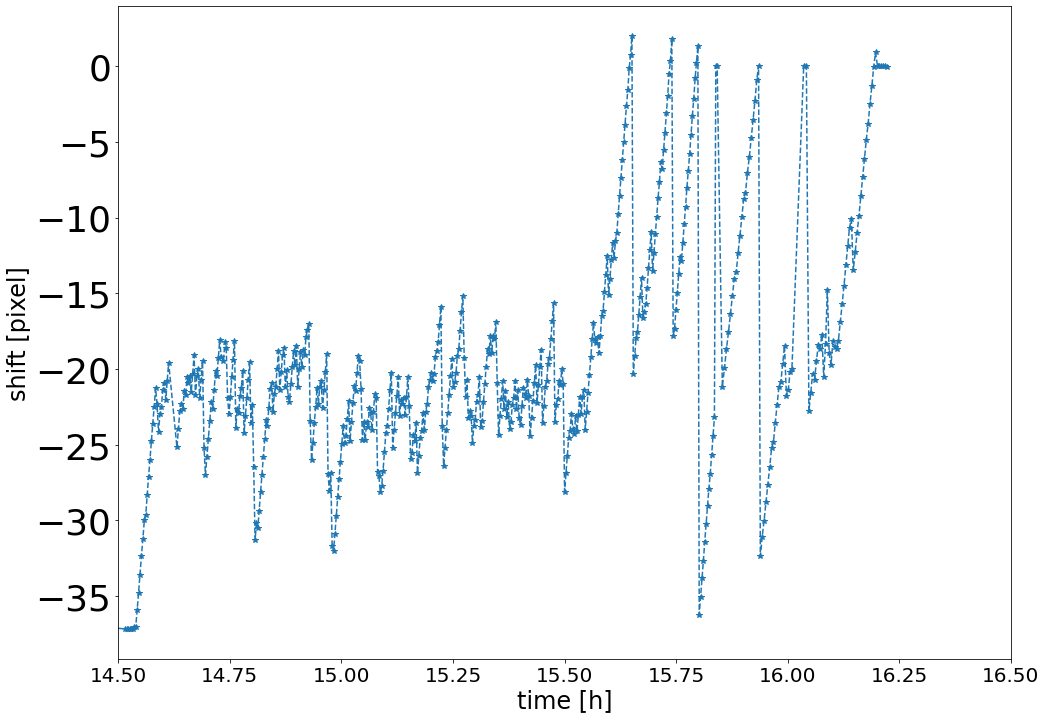

In [68]:
time_h=(time-time[0])/1e9/3600
plt.plot(time_h,height_h5,linestyle="--",marker="*")
plt.xlabel("time [h]")
plt.ylabel("shift [pixel]")
plt.xlim(14.5,16.5)
#plt.ylim(-5,1)

(14.5, 16.5)

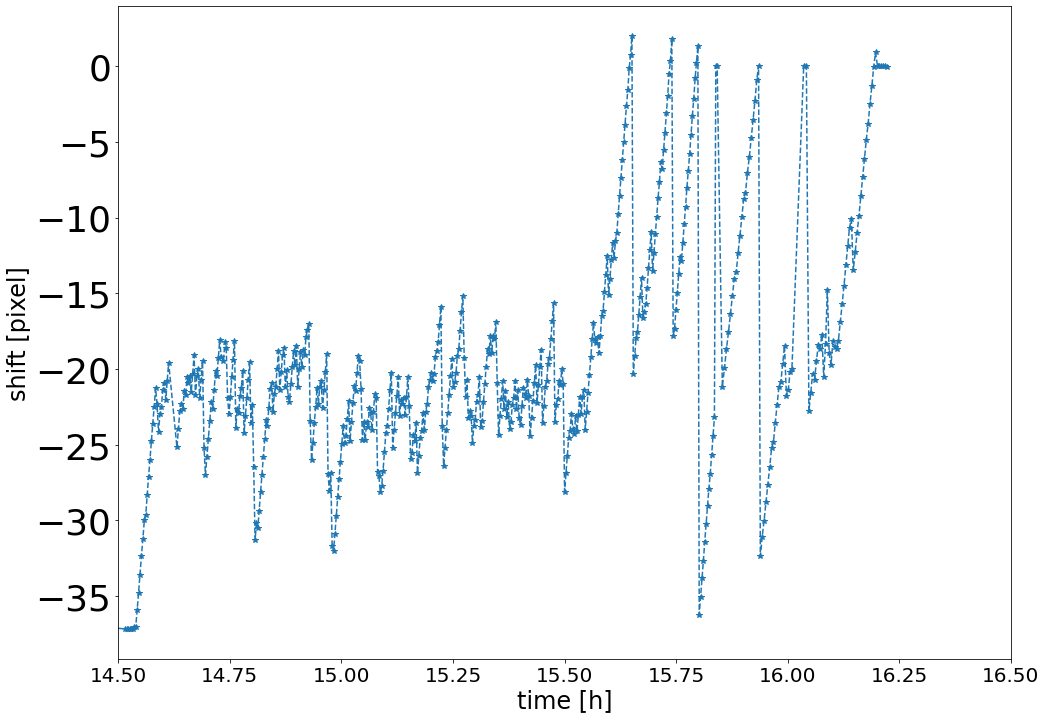

In [18]:
time_h=(time-time[0])/1e9/3600
plt.plot(time_h,height_h5,linestyle="--",marker="*")
plt.xlabel("time [h]")
plt.ylabel("shift [pixel]")
plt.xlim(14.5,16.5)
#plt.ylim(-5,1)

(14.0, 17.032693533624126)

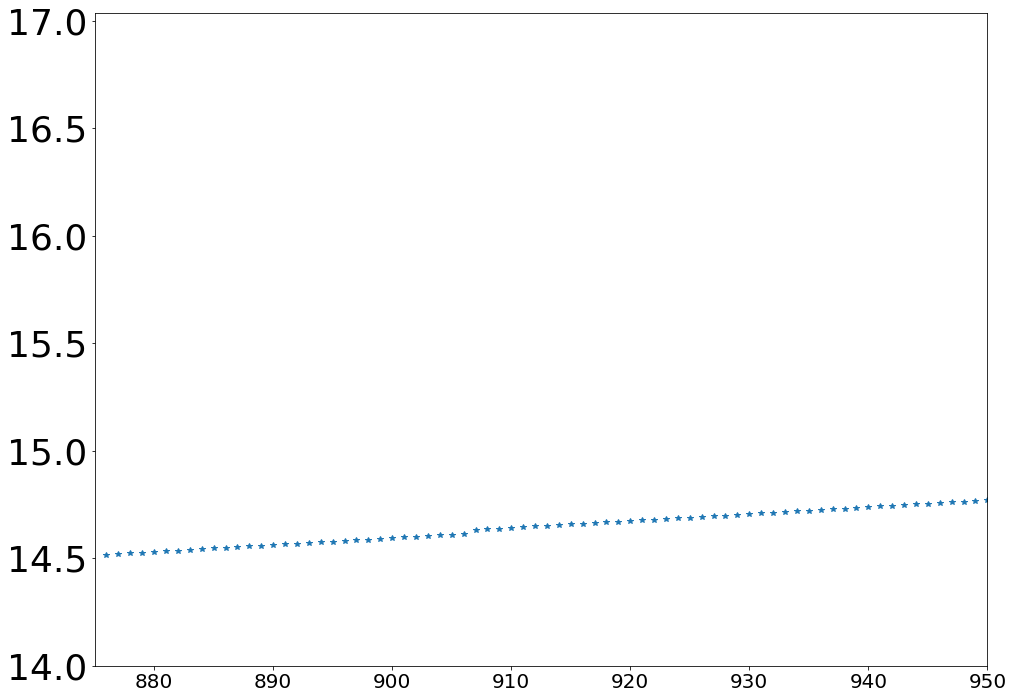

In [34]:
plt.plot(np.divide((time-time[0]),(1e9*3600)),linestyle="",marker="*")
plt.xlim(875,950)
plt.ylim(14,)

(14.5, 16.5)

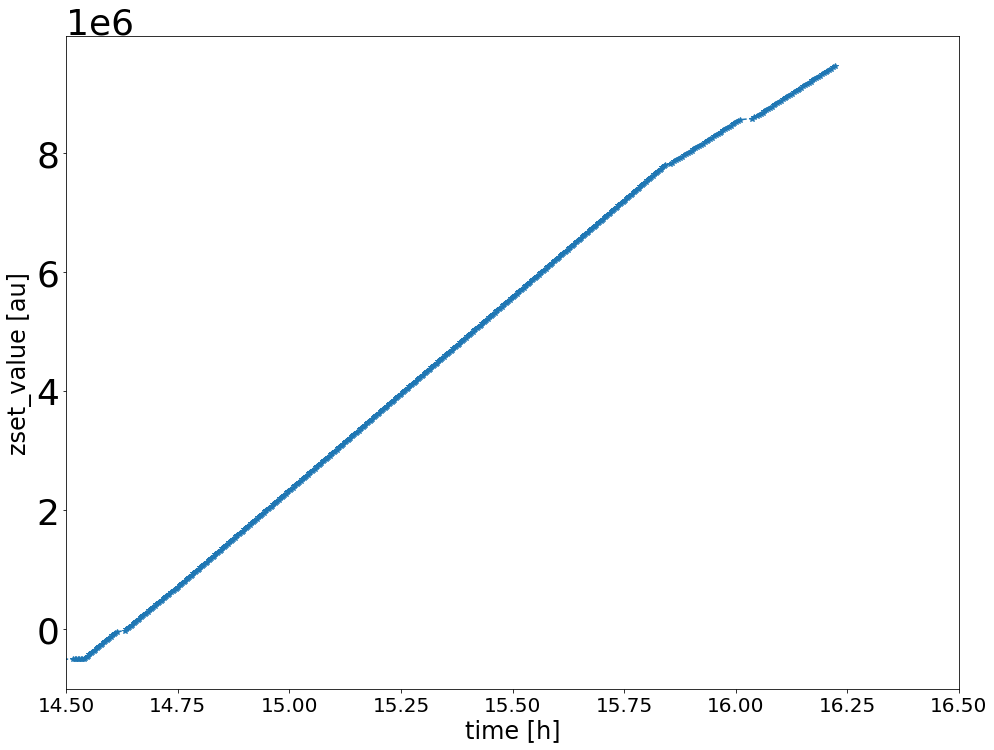

In [17]:
time_h=(time-time[0])/1e9/3600
plt.plot(time_h,zset_h5,linestyle="--",marker="*")
plt.xlabel("time [h]")
plt.ylabel("zset_value [au]")
plt.xlim(14.5,16.5)
#plt.ylim(-5,1)

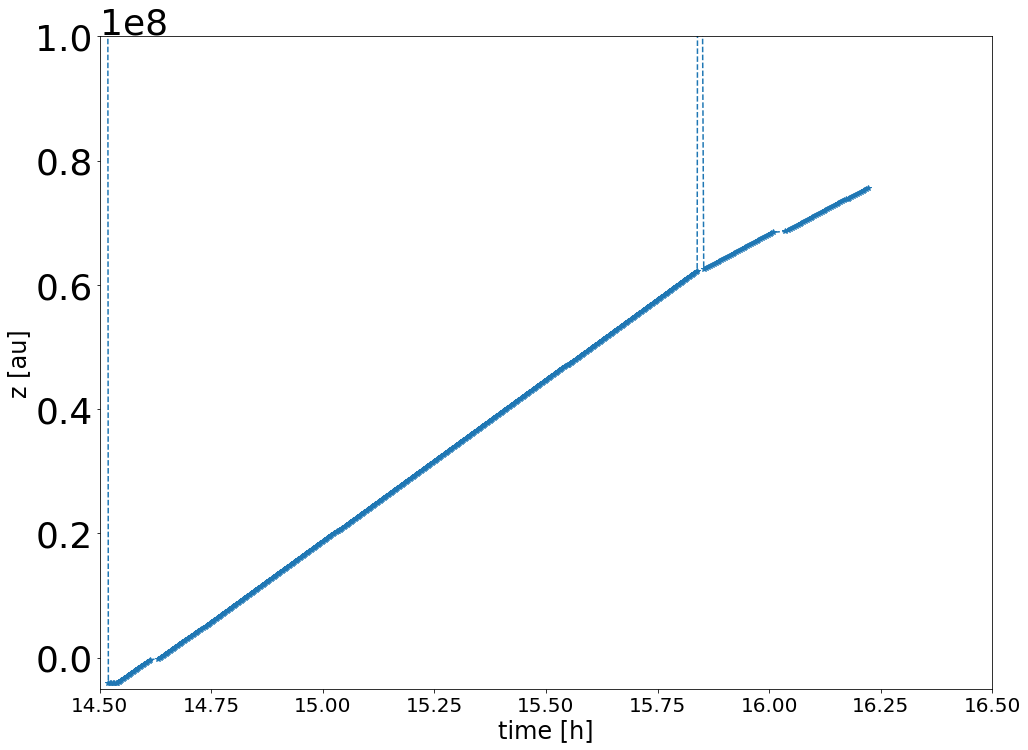

In [41]:
time_h=(time-time[0])/1e9/3600
plt.plot(time_h,z_h5,linestyle="--",marker="*")
plt.xlabel("time [h]")
plt.ylabel("z [au]")
plt.xlim(14.5,16.5)
plt.ylim(-5e6,1e8)
plt.show()

(-1500.0, 1000.0)

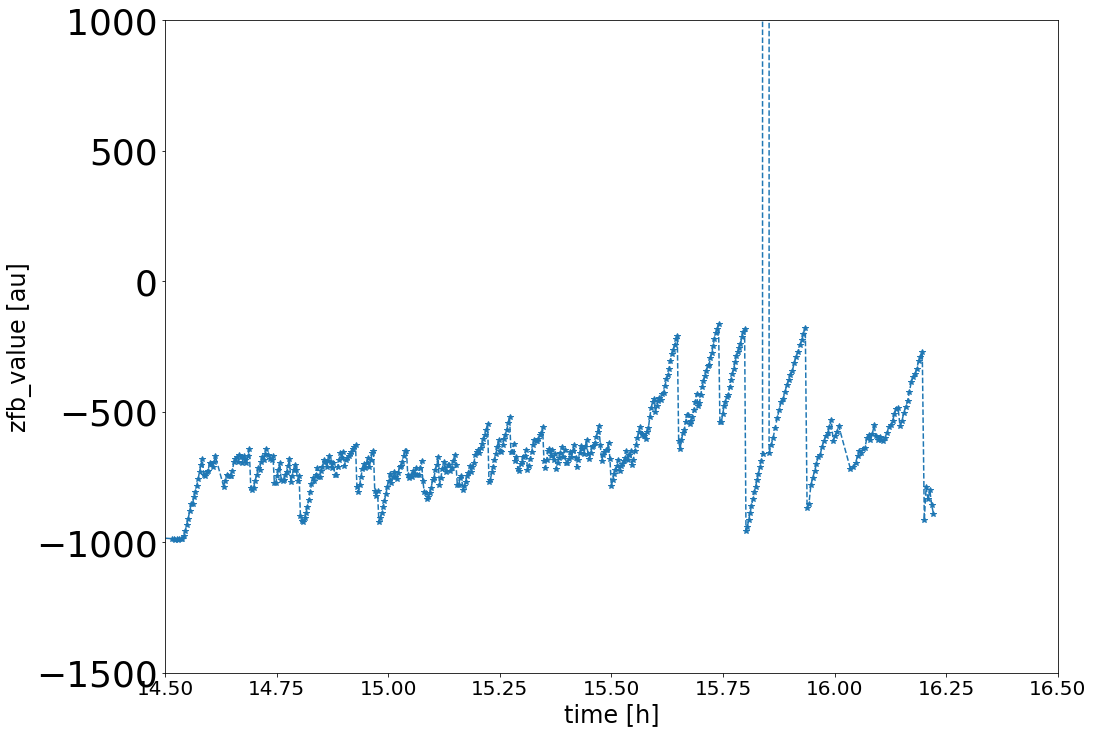

In [51]:
time_h=(time-time[0])/1e9/3600
plt.plot(time_h,zfb_h5,linestyle="--",marker="*")
plt.xlabel("time [h]")
plt.ylabel("zfb_value [au]")
plt.xlim(14.5,16.5)
plt.ylim(-1500,1000)

(14.5, 16.5)

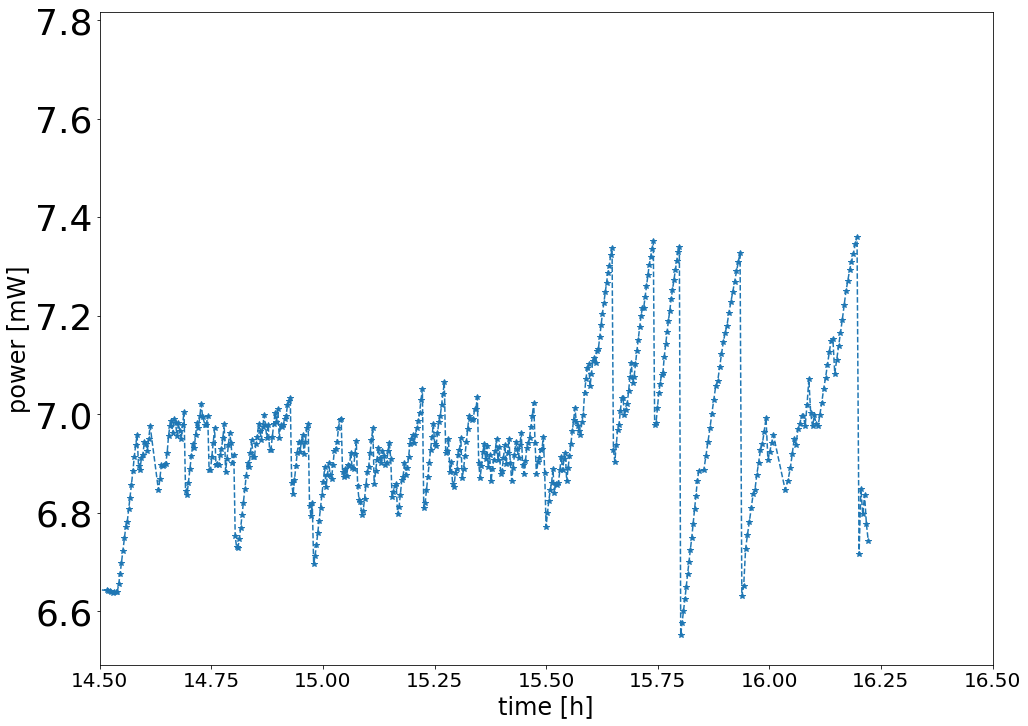

In [66]:
time_h=(time-time[0])/1e9/3600
power = [au_to_power(element) for element in Iz_h5]
plt.plot(time_h,power,linestyle="--",marker="*")
plt.xlabel("time [h]")
plt.ylabel("power [mW]")
plt.xlim(14.5,16.5)
#plt.ylim(-1500,1000)

In [63]:
Iz_h5

[-534517.56552,
 -534417.25628,
 -534376.85702,
 -534382.2778,
 -534469.66348,
 -534594.2931,
 -534344.87544,
 -535282.99232,
 -535221.73494,
 -534769.22488,
 -533817.9033,
 -535332.84842,
 -535252.50982,
 -535379.6697,
 -535343.99746,
 -535398.56668,
 -535323.49622,
 -535150.23366,
 -535075.61176,
 -535397.01236,
 -535824.8669,
 -535920.8986,
 -535720.49654,
 -535925.32736,
 -535913.13656,
 -535965.24798,
 -536107.81782,
 -536223.29038,
 -536333.42808,
 -536346.94544,
 -536437.9364,
 -536460.0861,
 -536587.88996,
 -536833.29742,
 -537004.67404,
 -537269.5874,
 -537313.153,
 -537205.10534,
 -537307.5408,
 -537473.17434,
 -537378.75478,
 -537433.82924,
 -537446.86892,
 -537409.7328,
 -537200.99968,
 -537000.37006,
 -537012.0623,
 -536902.0266,
 -536960.8168,
 -537186.55584,
 -537300.2629,
 -537308.18488,
 -537342.93254,
 -537387.51608,
 -537387.94702,
 -537445.3613,
 -536677.30282,
 -536762.1666,
 -537578.98912,
 -537495.8381,
 -537416.68104,
 -537483.44486,
 -537963.49252,
 -537841.351

In [ ]:
time_h=(time-time[0])/1e9/3600
plt.plot(time_h,height_PCC)
plt.xlabel("time [h]")
plt.ylabel("shift [pixel]")